In [1]:
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import glob
import time
import pandas as pd
from statistics import mean
import math

# plt.rcParams["figure.figsize"] = (3,3)
print (time.ctime())

Thu Jul 22 17:33:33 2021


In [173]:
# file1 = "/home/imaginglab/Data/TPX3/CHIP0/Test/8x8Grid_visEq_1s_W0028_F03-200228-095644-1.csv"
file1 ="E:/Data/AOM7142021/AOM_7142021_5.0V_100nsPW_6usDelay_W0028_H07-210714-162118-1.csv"
print (file1, time.ctime())

data1 = pd.read_csv(file1) 
print(pd.read_csv(file1, nrows=5))
print(time.ctime())


# file2 = "/home/imaginglab/Data/TPX3/CHIP0/Test/8x8Grid_SettingsEq_1s_W0028_F03-200228-100050-1.csv"
file2 ="E:/Data/AOM7142021/AOM_7142021_5.0V_100nsPW_6usDelay_ZeroOrderOnly_W0028_H07-210714-162140-1.csv"
print (file2, time.ctime())

data2 =pd.read_csv(file2, skiprows=[445])
print(pd.read_csv(file2, nrows=5))
print(time.ctime())


# # file1 = "/home/imaginglab/Data/TPX3/CHIP0/Test/8x8Grid_visEq_1s_W0028_F03-200228-095644-1.csv"
# file3 ="/home/andrei//Data/TPX3/CHIP0/Test/AOM4212021/AOM_4212021_1.6V_100nsPW_1usDelay_ZeroOrderOnly_W0028_H07-210421-172352-1.csv"
# print (file3, time.ctime())

# data3 = pd.read_csv(file3) 
# print(pd.read_csv(file3, nrows=5))
# print(time.ctime())


# # file2 = "/home/imaginglab/Data/TPX3/CHIP0/Test/8x8Grid_SettingsEq_1s_W0028_F03-200228-100050-1.csv"
# file4 = "/home/andrei//Data/TPX3/CHIP0/Test/AOM4212021/AOM_4212021_1.6V_100nsPW_1usDelay_ZeroOrderOnly_W0028_H07-210421-172352-1_time.csv"
# print (file4, time.ctime())

# data4 =pd.read_csv(file4)
# print(pd.read_csv(file4, nrows=5))
# print(time.ctime())

E:/Data/AOM7142021/AOM_7142021_5.0V_100nsPW_6usDelay_W0028_H07-210714-162118-1.csv Thu Jul 22 18:55:48 2021
   #TrigId     #TrigTime  #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  \
0      933  156799214890   176   144  156867065856         25              25   
1      934  156963333760   181   135  156964308224       1100            1100   
2      934  156963333760    68   128  156964308224       2025            2025   
3      934  156963333760    73   135  156964308224       2000            2000   
4      934  156963333760    73   128  156964308224       2225            2225   

   #Trig-ToA[arb]  Unnamed: 8  
0        67850966         NaN  
1          974464         NaN  
2          974464         NaN  
3          974464         NaN  
4          974464         NaN  
Thu Jul 22 18:56:26 2021
E:/Data/AOM7142021/AOM_7142021_5.0V_100nsPW_6usDelay_ZeroOrderOnly_W0028_H07-210714-162140-1.csv Thu Jul 22 18:56:26 2021
   #TrigId     #TrigTime  #Col  #Row          #ToA  #ToT[arb]  #To

In [174]:
data1.shape, data2.shape
# , data3.shape, data4.shape

((40359297, 9), (44594956, 9))

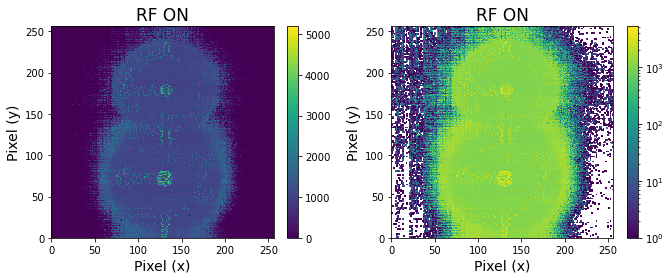

In [175]:
#File 1 grid
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(9.5, 4))

h = ax0.hist2d(data1['#Row'], data1['#Col'], bins = 256, range = [(0, 256), (0, 256)])
fig.colorbar(h[3], ax = ax0)
ax0.set_xlabel('Pixel (x)', fontsize=14)
ax0.set_ylabel('Pixel (y)', fontsize=14)
ax0.set_title('RF ON', fontsize=17)

h = ax1.hist2d(data1['#Row'], data1['#Col'], bins = 256, range = [(0, 256), (0, 256)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax1)
ax1.set_xlabel('Pixel (x)', fontsize=14)
ax1.set_ylabel('Pixel (y)', fontsize=14)
ax1.set_title('RF ON', fontsize=17)

fig.tight_layout()
plt.show()

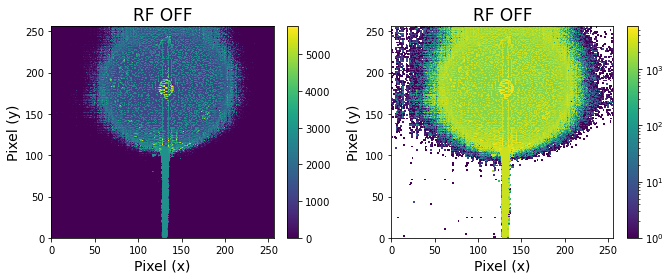

In [176]:
#File 1 grid
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(9.5, 4))

h = ax0.hist2d(data2['#Row'], data2['#Col'], bins = 256, range = [(0, 256), (0, 256)])
fig.colorbar(h[3], ax = ax0)
ax0.set_xlabel('Pixel (x)', fontsize=14)
ax0.set_ylabel('Pixel (y)', fontsize=14)
ax0.set_title('RF OFF', fontsize=17)

h = ax1.hist2d(data2['#Row'], data2['#Col'], bins = 256, range = [(0, 256), (0, 256)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax1)
ax1.set_xlabel('Pixel (x)', fontsize=14)
ax1.set_ylabel('Pixel (y)', fontsize=14)
ax1.set_title('RF OFF', fontsize=17)

fig.tight_layout()
plt.show()

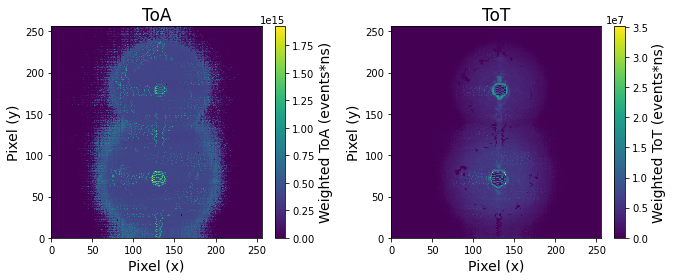

In [177]:
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(9.5, 4), facecolor='w')
# data1['#Row'], data1['#Col'], bins = GridX1max-GridX1min, range = [(GridX1min, GridX1max), (GridY1min, GridY1max)]
h = ax0.hist2d(data1['#Row'], 
               data1['#Col'], 
               weights=data1['#ToA'], 
               bins = 256, range = [(0, 256), (0, 256)],
               )
cbar1 = fig.colorbar(h[3], ax = ax0)
#     cbar1.set_ticks([0,50,100,150,200,250])
#     tick_locator = ticker.MaxNLocator(nbins=6)
#     cbar1.locator = tick_locator
#     cbar1.update_ticks()
cbar1.set_label('Weighted ToA (events*ns)', fontsize=14)
ax0.set_xlabel('Pixel (x)', fontsize=14)
ax0.set_ylabel('Pixel (y)', fontsize=14)
ax0.set_title('ToA', fontsize=17)

h = ax1.hist2d(data1['#Row'], 
               data1['#Col'], 
               weights=data1['#ToT[arb]'], 
               bins = 256, range = [(0, 256), (0, 256)],
               )
cbar2 = fig.colorbar(h[3], ax = ax1)
#     cbar2.set_ticks([0,300,600,900,1200,1500])
#     tick_locator = ticker.MaxNLocator(nbins=6)
#     cbar2.locator = tick_locator
#     cbar2.update_ticks()
cbar2.set_label('Weighted ToT (events*ns)', fontsize=14)
ax1.set_xlabel('Pixel (x)', fontsize=14)
ax1.set_ylabel('Pixel (y)', fontsize=14)
ax1.set_title('ToT', fontsize=17)
fig.tight_layout()

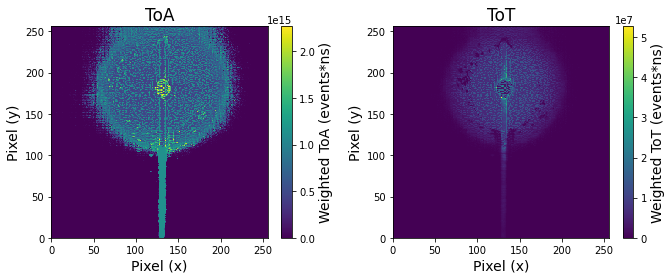

In [178]:
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(9.5, 4), facecolor='w')
# data2['#Row'], data2['#Col'], bins = GridX1max-GridX1min, range = [(GridX1min, GridX1max), (GridY1min, GridY1max)]
h = ax0.hist2d(data2['#Row'], 
               data2['#Col'], 
               weights=data2['#ToA'], 
               bins = 256, range = [(0, 256), (0, 256)],
               )
cbar1 = fig.colorbar(h[3], ax = ax0)
#     cbar1.set_ticks([0,50,100,150,200,250])
#     tick_locator = ticker.MaxNLocator(nbins=6)
#     cbar1.locator = tick_locator
#     cbar1.update_ticks()
cbar1.set_label('Weighted ToA (events*ns)', fontsize=14)
ax0.set_xlabel('Pixel (x)', fontsize=14)
ax0.set_ylabel('Pixel (y)', fontsize=14)
ax0.set_title('ToA', fontsize=17)

h = ax1.hist2d(data2['#Row'], 
               data2['#Col'], 
               weights=data2['#ToT[arb]'], 
               bins = 256, range = [(0, 256), (0, 256)],
               )
cbar2 = fig.colorbar(h[3], ax = ax1)
#     cbar2.set_ticks([0,300,600,900,1200,1500])
#     tick_locator = ticker.MaxNLocator(nbins=6)
#     cbar2.locator = tick_locator
#     cbar2.update_ticks()
cbar2.set_label('Weighted ToT (events*ns)', fontsize=14)
ax1.set_xlabel('Pixel (x)', fontsize=14)
ax1.set_ylabel('Pixel (y)', fontsize=14)
ax1.set_title('ToT', fontsize=17)
fig.tight_layout()

In [179]:
# #File 1 grid
# fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(9.5, 4))

# h = ax0.hist2d(data1['#ToT[arb]'], data1['#Row'], bins = 256, range = [(0, 256), (0, 256)])
# fig.colorbar(h[3], ax = ax0)

# h = ax1.hist2d(data1['#ToT[arb]'], data1['#Row'], bins = 256, range = [(0, 256), (0, 256)], norm=mpl.colors.LogNorm())
# fig.colorbar(h[3], ax = ax1)
# fig.tight_layout()
# plt.show()

In [180]:
# # r1 = t1[len(t1)//2:]/4096*25
# # f1 = a1[len(a1)//2:]
# plt.rcParams["figure.figsize"] = (20,6)
# #len(t) = 8550085 
# #
# #plt.scatter(r,f)
# plt.plot(data1['#ToT[arb]'], data1['#Col'],'.')
# #plt.plot(r, f, 'xb-')
# #plt.title("TOT", fontsize = 12) # change the title
# plt.xlabel('TOT (ns)',fontsize = 12)
# plt.ylabel('Y (Pixels)',fontsize = 12)
# # for i in range(5000):
# #     plt.axvline(x=(TrigTime[i]/4096.*25.), ymin=0, ymax=2500, color='k')
# #     plt.axvline(x=((TrigTime[i]/4096.*25.)+10000), ymin=0, ymax=2500, color='r')
# # # plt.axvline(x=(TOA_MIN/4096.*25.), ymin=0, ymax=2500, color='k')
# # plt.xlim(963691753.125-50, 963691753.125+250)
# # plt.xlim(3.25875e9, 3.2592e9)
# # plt.xlim(3.03e9, 3.032e9)
# # plt.savefig('TOTvsTOA_256x256_8212020_025447-1_cent.png', bbox_inches='tight')
# time.ctime()

In [181]:
# # r1 = t1[len(t1)//2:]/4096*25
# # f1 = a1[len(a1)//2:]
# plt.rcParams["figure.figsize"] = (20,6)
# #len(t) = 8550085 
# #
# #plt.scatter(r,f)
# plt.plot(data1['#ToT[arb]'], data1['#Row'],'.')
# #plt.plot(r, f, 'xb-')
# #plt.title("TOT", fontsize = 12) # change the title
# plt.xlabel('TOT (ns)',fontsize = 12)
# plt.ylabel('X (Pixels)',fontsize = 12)
# # for i in range(5000):
# #     plt.axvline(x=(TrigTime[i]/4096.*25.), ymin=0, ymax=2500, color='k')
# #     plt.axvline(x=((TrigTime[i]/4096.*25.)+10000), ymin=0, ymax=2500, color='r')
# # # plt.axvline(x=(TOA_MIN/4096.*25.), ymin=0, ymax=2500, color='k')
# # plt.xlim(963691753.125-50, 963691753.125+250)
# # plt.xlim(3.25875e9, 3.2592e9)
# # plt.xlim(3.03e9, 3.032e9)
# # plt.savefig('TOTvsTOA_256x256_8212020_025447-1_cent.png', bbox_inches='tight')
# time.ctime()

In [182]:
# # Create df consisting of only the max ToTs
# globals()["X_max_df"] = data1[data1['#ToT[arb]'] == (data1['#ToT[arb]'].max())]
# print(globals()["X_max_df"].shape, globals()["X_max_df"].iloc[:2])

In [183]:
# XofPeak = globals()["X_max_df"]['#Row'].max()
# print(XofPeak)

In [184]:
# YOfPeak = 133
# Yslice_df = data1[(data1['#Col']<(YOfPeak+5)) & (data1['#Col']>(YOfPeak-5))]

In [185]:
# Xslice_df = data1[(data1['#Row']<(XofPeak+5)) & (data1['#Row']>(XofPeak-5))]

In [186]:
# # r1 = t1[len(t1)//2:]/4096*25
# # f1 = a1[len(a1)//2:]
# plt.rcParams["figure.figsize"] = (20,6)
# #len(t) = 8550085 
# #
# #plt.scatter(r,f)
# plt.plot(Xslice_df['#ToT[arb]'], Xslice_df['#Col'],'.')
# #plt.plot(r, f, 'xb-')
# #plt.title("TOT", fontsize = 12) # change the title
# plt.xlabel('TOT (ns)',fontsize = 12)
# plt.ylabel('Y (Pixels)',fontsize = 12)
# # for i in range(5000):
# #     plt.axvline(x=(TrigTime[i]/4096.*25.), ymin=0, ymax=2500, color='k')
# #     plt.axvline(x=((TrigTime[i]/4096.*25.)+10000), ymin=0, ymax=2500, color='r')
# # # plt.axvline(x=(TOA_MIN/4096.*25.), ymin=0, ymax=2500, color='k')
# # plt.xlim(963691753.125-50, 963691753.125+250)
# # plt.xlim(3.25875e9, 3.2592e9)
# # plt.xlim(3.03e9, 3.032e9)
# # plt.savefig('TOTvsTOA_256x256_8212020_025447-1_cent.png', bbox_inches='tight')
# time.ctime()

In [187]:
# ToTmax_df = data1[data1['#ToT[arb]'] == (data1['#ToT[arb]'].max())]
# xOfPeak = ToTmax_df['#Col'].min()
# print(xOfPeak)
# slice_df = data1[(data1['#Col']<(xOfPeak+10)) & (data1['#Col']>(xOfPeak-10))]

In [188]:
# plt.rcParams["figure.figsize"] = (20,6)

# plt.plot(slice_df['#ToT[arb]'], slice_df['#Col'],'.')
# #plt.plot(r, f, 'xb-')
# plt.title("Y Peak", fontsize = 12) # change the title
# plt.xlabel('TOT (ns)',fontsize = 12)
# plt.ylabel('Y (Pixels)',fontsize = 12)

In [189]:
# firstOrderX_df = data1[(data1['#Row']<(250)) & (data1['#Row']>(150))]

# firstOrder_ToTmax_df = firstOrderX_df[firstOrderX_df['#ToT[arb]'] == (firstOrderX_df['#ToT[arb]'].max())]
# xOfPeak = firstOrder_ToTmax_df['#Row'].min()
# print(xOfPeak)
# firstOrder_slice_df = data1[(data1['#Row']<(xOfPeak+10)) & (data1['#Row']>(xOfPeak-10))]

In [190]:
# plt.rcParams["figure.figsize"] = (20,6)

# plt.plot(firstOrder_slice_df['#ToT[arb]'], firstOrder_slice_df['#Row'],'.')
# #plt.plot(r, f, 'xb-')
# plt.title("First Order", fontsize = 12) # change the title
# plt.xlabel('TOT (ns)',fontsize = 12)
# plt.ylabel('X (Pixels)',fontsize = 12)

In [191]:
# fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(9.5, 4), facecolor='w')
# # data1['#Row'], data1['#Col'], bins = GridX1max-GridX1min, range = [(GridX1min, GridX1max), (GridY1min, GridY1max)]
# h = ax0.hist2d(data1['#Row'], 
#                data1['#Col'], 
#                weights=data1['#ToA'], 
#                bins = GridX1max-GridX1min, range = [(GridX1min, GridX1max), (GridY1min, GridY1max)],
#                )
# cbar1 = fig.colorbar(h[3], ax = ax0)
# #     cbar1.set_ticks([0,50,100,150,200,250])
# #     tick_locator = ticker.MaxNLocator(nbins=6)
# #     cbar1.locator = tick_locator
# #     cbar1.update_ticks()
# cbar1.set_label('Weighted ToA (ns)', fontsize=14)
# ax0.set_xlabel('Pixel (x)', fontsize=14)
# ax0.set_ylabel('Pixel (y)', fontsize=14)
# ax0.set_title('ToA', fontsize=17)

# h = ax0.hist2d(data1['#Row'], 
#                data1['#Col'], 
#                weights=data1['#ToT[arb]'], 
#                bins = GridX1max-GridX1min, range = [(GridX1min, GridX1max), (GridY1min, GridY1max)],
#                )
# cbar2 = fig.colorbar(h[3], ax = ax1)
# #     cbar2.set_ticks([0,300,600,900,1200,1500])
# #     tick_locator = ticker.MaxNLocator(nbins=6)
# #     cbar2.locator = tick_locator
# #     cbar2.update_ticks()
# cbar2.set_label('Weighted ToT (ns)', fontsize=14)
# ax1.set_xlabel('Pixel (x)', fontsize=14)
# ax1.set_ylabel('Pixel (y)', fontsize=14)
# ax1.set_title('ToT', fontsize=17)
# fig.tight_layout()

In [192]:
# file1 = "E:/Data/AOM3242021/AOM_3242021_1.5V_100nsPW_1usDelay__W0028_H07-210324-183439-1.csv"
# print (file1, time.ctime())

# data1 =pd.read_csv(file1)
# print(pd.read_csv(file1, nrows=5))
# print(time.ctime())
# print(data1.shape)

In [193]:
# def min_max(data, grid_x_min, grid_x_max, grid_y_min, grid_y_max):
#     """Returns DataFrame filtering values less than min or greater than max for two columns"""
#     x_cond = (data['#Row'] >grid_x_min) & (data['#Row'] < grid_x_max)
#     y_cond = (data['#Col'] > grid_y_min) & (data['#Col'] < grid_y_max)
#     new_data = data[x_cond & y_cond]
#     return new_data



In [194]:
# oth_df = min_max(data1, 20, 120, 80, 180)
# # Pt1_ToT_df = grid1_df.drop(grid1_df[(grid1_df['#ToT[arb]'] > tMin2) & (grid1_df['#ToT[arb]'] < tMax2)].index)

# print(oth_df.shape, type(oth_df.iloc[0,0]), type(oth_df.iloc[1,1]), time.ctime())
# print(oth_df.iloc[:3])

In [195]:
# first_df = min_max(data1, 170, 230, 110, 170)
# # Pt1_ToT_df = grid1_df.drop(grid1_df[(grid1_df['#ToT[arb]'] > tMin2) & (grid1_df['#ToT[arb]'] < tMax2)].index)

# print(first_df.shape, type(first_df.iloc[0,0]), type(first_df.iloc[1,1]), time.ctime())
# print(first_df.iloc[:3])

In [196]:
# othtot = oth_df['#ToT[arb]'].to_numpy()
# othtotavg = np.nanmean(othtot)
# print(othtotavg)

In [197]:
# firsttot = first_df['#ToT[arb]'].to_numpy()
# firstotavg = np.nanmean(firsttot)
# print(firstotavg)

In [198]:
# print("DE:", (firstotavg/othtotavg)*100, "%")

In [199]:
# # file1 ="E:/Data/AOM242021/AOM_5s_10usGW_80MHz_FC_APC_1Vpp_W0028_H07-210204-144349-1.csv"
# # h = ax0.hist2d(data1['#Row'], data1['#Col'], bins = 100, range = [(0, 100), (100, 200)])
# # fig.colorbar(h[3], ax = ax0)

# # h = ax1.hist2d(data1['#Row'], data1['#Col'], bins = 100, range = [(0, 100), (100, 200)], norm=mpl.colors.LogNorm())
# #File 1 grid

# # AOM_3242021_1.5V_100nsPW_1usDelay__W0028_H07-210324-183439-1
# fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(9.5, 4))

# h = ax0.hist2d(data1['#Row'], data1['#Col'], bins = 55, range = [(115, 170), (40, 95)])
# fig.colorbar(h[3], ax = ax0)
# ax0.set_xlabel('Pixel (x)', fontsize=14)
# ax0.set_ylabel('Pixel (y)', fontsize=14)
# ax0.set_title('First Order Spot', fontsize=17)


# h = ax1.hist2d(data1['#Row'], data1['#Col'], bins = 55, range = [(115, 170), (40, 95)], norm=mpl.colors.LogNorm())
# fig.colorbar(h[3], ax = ax1)
# ax1.set_xlabel('Pixel (x)', fontsize=14)
# ax1.set_ylabel('Pixel (y)', fontsize=14)
# ax1.set_title('First Order Spot', fontsize=17)


# fig.tight_layout()
# plt.show()
# # fig.savefig('fullgrid_8212020_025044-1_cent.png')

In [200]:
# # file1 ="E:/Data/AOM242021/AOM_5s_10usGW_80MHz_FC_APC_1Vpp_W0028_H07-210204-144349-1.csv"
# # h = ax0.hist2d(data2['#Row'], data2['#Col'], bins = 60, range = [(115, 175), (130, 190)])
# # fig.colorbar(h[3], ax = ax0)

# # h = ax1.hist2d(data2['#Row'], data2['#Col'], bins = 60, range = [(115, 175), (130, 190)], norm=mpl.colors.LogNorm())
# #File 1 grid

# # AOM_3242021_1.5V_100nsPW_1usDelay__W0028_H07-210324-183439-1
# fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(9.5, 4))

# h = ax0.hist2d(data2['#Row'], data2['#Col'], bins = 65, range = [(115, 180), (145, 210)])
# fig.colorbar(h[3], ax = ax0)
# ax0.set_xlabel('Pixel (x)', fontsize=14)
# ax0.set_ylabel('Pixel (y)', fontsize=14)
# ax0.set_title('Zeroth Order Spot', fontsize=17)


# h = ax1.hist2d(data2['#Row'], data2['#Col'], bins = 65, range = [(115, 180), (145, 210)], norm=mpl.colors.LogNorm())
# fig.colorbar(h[3], ax = ax1)
# ax1.set_xlabel('Pixel (x)', fontsize=14)
# ax1.set_ylabel('Pixel (y)', fontsize=14)
# ax1.set_title('Zeroth Order Spot', fontsize=17)

# fig.tight_layout()
# plt.show()
# # fig.savefig('fullgrid_8212020_025044-1_cent.png')

In [201]:
def min_max(data, grid_x_min, grid_x_max, grid_y_min, grid_y_max):
    """Returns DataFrame filtering values less than min or greater than max for two columns"""
    x_cond = (data['#Row'] >grid_x_min) & (data['#Row'] < grid_x_max)
    y_cond = (data['#Col'] > grid_y_min) & (data['#Col'] < grid_y_max)
    new_data = data[x_cond & y_cond]
    return new_data



In [202]:
oth_df = min_max(data2, 115, 180, 145, 210)
# Pt1_ToT_df = grid1_df.drop(grid1_df[(grid1_df['#ToT[arb]'] > tMin2) & (grid1_df['#ToT[arb]'] < tMax2)].index)

print(oth_df.shape, type(oth_df.iloc[0,0]), type(oth_df.iloc[1,1]), time.ctime())
print(oth_df.iloc[:3])

(7625368, 9) <class 'numpy.int64'> <class 'numpy.int64'> Thu Jul 22 18:58:25 2021
   #TrigId     #TrigTime  #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  \
0      938  157756294528   176   144  157915739136       75.0            75.0   
1      938  157756294528   176   144  157915898368       75.0            75.0   
2      939  157920413952   176   135  157921388032     1775.0          1775.0   

   #Trig-ToA[arb]  Unnamed: 8  
0     159444608.0         NaN  
1     159603840.0         NaN  
2        974080.0         NaN  


In [203]:
first_df = min_max(data1, 115, 170, 40, 95) 
# Pt1_ToT_df = grid1_df.drop(grid1_df[(grid1_df['#ToT[arb]'] > tMin2) & (grid1_df['#ToT[arb]'] < tMax2)].index)

print(first_df.shape, type(first_df.iloc[0,0]), type(first_df.iloc[1,1]), time.ctime())
print(first_df.iloc[:3])

(3511592, 9) <class 'numpy.int64'> <class 'numpy.int64'> Thu Jul 22 18:58:25 2021
   #TrigId     #TrigTime  #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  \
2      934  156963333760    68   128  1.569643e+11     2025.0          2025.0   
3      934  156963333760    73   135  1.569643e+11     2000.0          2000.0   
4      934  156963333760    73   128  1.569643e+11     2225.0          2225.0   

   #Trig-ToA[arb]  Unnamed: 8  
2        974464.0         NaN  
3        974464.0         NaN  
4        974464.0         NaN  


In [204]:
# GRIDToTsum = np.nansum(grid1_df['#ToT[arb]'].to_numpy())
_0thToTsum = np.nansum(oth_df['#ToT[arb]'].to_numpy())
FirstToTsum = np.nansum(first_df['#ToT[arb]'].to_numpy())
# YToTsum = np.nansum(Y_df['#ToT[arb]'].to_numpy())
# XToTsum = np.nansum(X_df['#ToT[arb]'].to_numpy())
# print("GRIDToTsum:", GRIDToTsum)
print("0thToTsum:", _0thToTsum)
print("FirstToTsum:", FirstToTsum)
# print("XToTsum:", XToTsum)
# print("YToTsum:", YToTsum)

print("First/0th:", FirstToTsum/_0thToTsum)
print("Diffraction efficiency: %.2f %%" % ((FirstToTsum/_0thToTsum)*100))
# print("Y/0th:", YToTsum/_0thToTsum)
# print("X/0th:", XToTsum/_0thToTsum)
# print("grid spots/non-grid spots:", GRIDToTsum/(_0thToTsum+YToTsum+XToTsum))
# print("diffracted/0th:", (GRIDToTsum+YToTsum+XToTsum)/_0thToTsum)
TOTsums =[_0thToTsum,FirstToTsum]

0thToTsum: 40214974800.0
FirstToTsum: 17964967650.0
First/0th: 0.4467233347613586
Diffraction efficiency: 44.67 %


In [205]:
# Write ToT sums to txt file for plotting cumlative data later
with open('ToTs.txt', 'a') as file1:
    for tot in TOTsums:
        file1.write("%d\n" % tot)
        
file1.close()

In [206]:
# ToTs; append ToTs for txt file to cumlative list for 0th, grid, sidebars
# Note: order or appending is based on order of TOTsums array for imshow plot "ToT sums";
# may be changed due to beam output orientation on CCD
_0thToTs = []
FirstToTs = []

with open('ToTs.txt') as file1:
    line_number = 0
    lines = file1.readlines()
    for i in range(int(len(lines)/2)):
        _0thToTs.append(int(lines[line_number].strip()))
        FirstToTs.append(int(lines[line_number+1].strip()))
        line_number+=2

In [207]:
print("_0thToTs:", _0thToTs)
print("FirstToTs:", FirstToTs)

_0thToTs: [7106754875, 31497925025, 37863650, 23411495975, 26563606025, 22694518575, 33819506500, 40214974800]
FirstToTs: [5468897825, 25556544950, 14288957775, 18307622275, 23722416850, 18048556525, 15738801125, 17964967650]


In [ ]:
import os
if os.path.exists("ToTs.txt"):
    os.remove("ToTs.txt")
else:
    print("The file does not exist")

In [208]:
# Percentages
DEs = [((a/b)*100) for a,b in zip(FirstToTs, _0thToTs)]

In [209]:
inputPwr = [0.25, 0.28, 0.34, 0.65, 0.70, 1.50, 1.90, 2.35] # Power at AOD Input [uW]

'Thu Jul 22 19:13:23 2021'

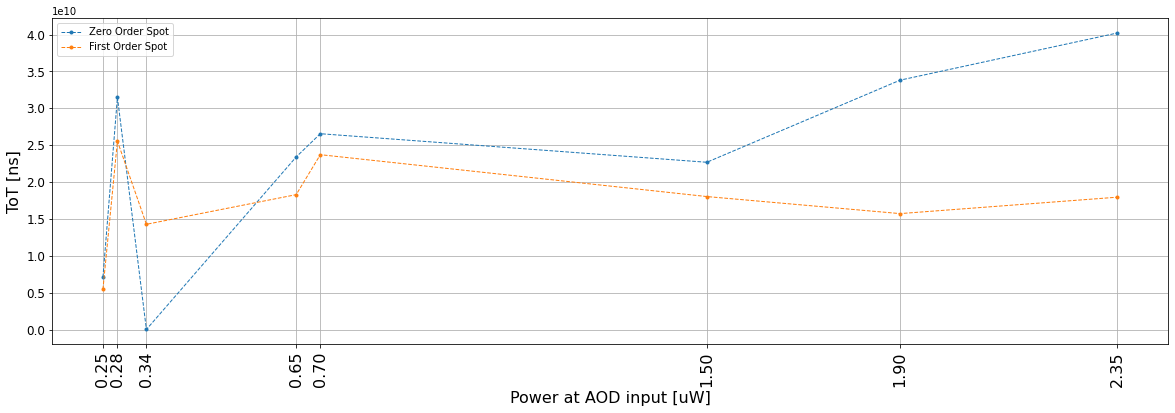

In [210]:
plt.rcParams["figure.figsize"] = (20,6)

plt.plot(inputPwr,_0thToTs, '.', linestyle='--', linewidth=1)
plt.plot(inputPwr,FirstToTs, '.', linestyle='--', linewidth=1)
#plt.title("TOT", fontsize = 12) # change the title
plt.xlabel('Power at AOD input [uW]',fontsize = 16)
plt.ylabel('ToT [ns]',fontsize = 16)
plt.xticks(inputPwr, fontsize = 16, rotation="vertical")
plt.yticks(fontsize=12)
plt.grid()
plt.legend(["Zero Order Spot", "First Order Spot"])

# plt.savefig('TOTvsTOA_256x256_8212020_025447-1_cent.png', bbox_inches='tight')
time.ctime()

'Thu Jul 22 19:13:24 2021'

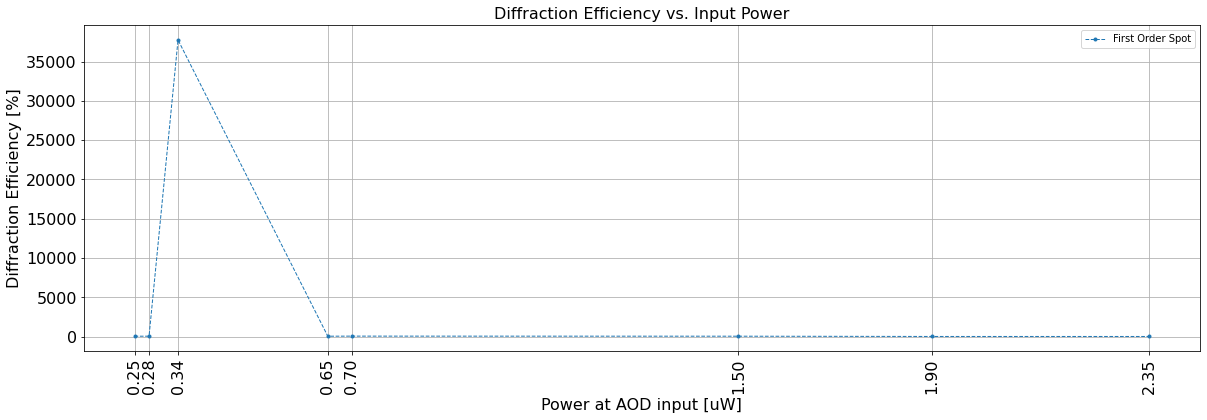

In [211]:
plt.rcParams["figure.figsize"] = (20,6)

plt.plot(inputPwr,DEs, '.', linestyle='--', linewidth=1)
plt.title("Diffraction Efficiency vs. Input Power", fontsize = 16) # change the title
plt.xlabel('Power at AOD input [uW]',fontsize = 16)
plt.ylabel('Diffraction Efficiency [%]',fontsize = 16)
plt.xticks(inputPwr, fontsize = 16, rotation="vertical")
plt.yticks(fontsize=16)
plt.grid()
plt.legend(["First Order Spot"])

# plt.savefig('TOTvsTOA_256x256_8212020_025447-1_cent.png', bbox_inches='tight')
time.ctime()

In [212]:
_0thToTs.pop(2)
FirstToTs.pop(2)
DEs.pop(2)
inputPwr.pop(2)

0.34

'Thu Jul 22 19:18:30 2021'

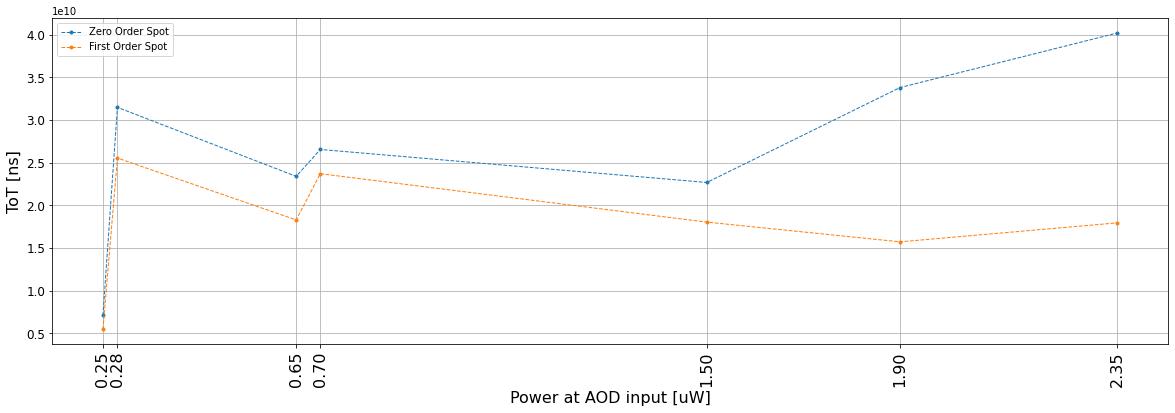

In [213]:
plt.rcParams["figure.figsize"] = (20,6)

plt.plot(inputPwr,_0thToTs, '.', linestyle='--', linewidth=1)
plt.plot(inputPwr,FirstToTs, '.', linestyle='--', linewidth=1)
#plt.title("TOT", fontsize = 12) # change the title
plt.xlabel('Power at AOD input [uW]',fontsize = 16)
plt.ylabel('ToT [ns]',fontsize = 16)
plt.xticks(inputPwr, fontsize = 16, rotation="vertical")
plt.yticks(fontsize=12)
plt.grid()
plt.legend(["Zero Order Spot", "First Order Spot"])

# plt.savefig('TOTvsTOA_256x256_8212020_025447-1_cent.png', bbox_inches='tight')
time.ctime()

'Thu Jul 22 19:18:31 2021'

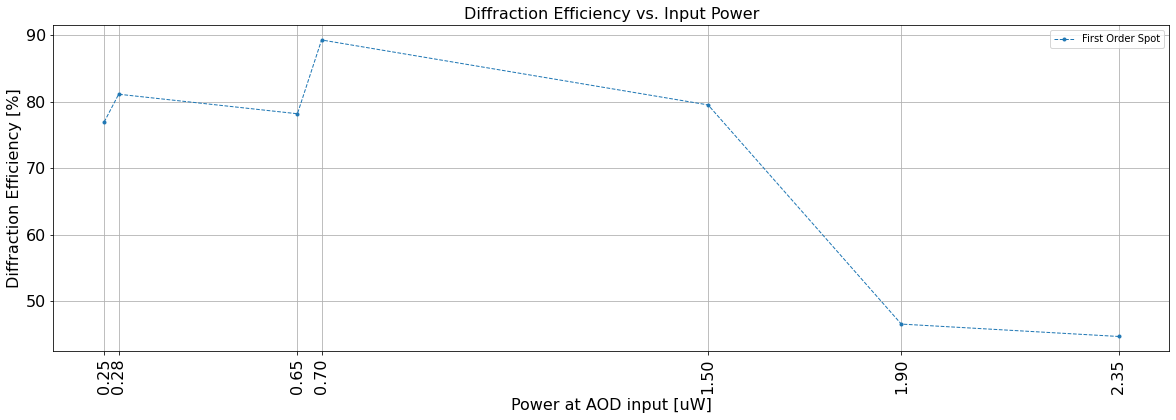

In [214]:
plt.rcParams["figure.figsize"] = (20,6)

plt.plot(inputPwr,DEs, '.', linestyle='--', linewidth=1)
plt.title("Diffraction Efficiency vs. Input Power", fontsize = 16) # change the title
plt.xlabel('Power at AOD input [uW]',fontsize = 16)
plt.ylabel('Diffraction Efficiency [%]',fontsize = 16)
plt.xticks(inputPwr, fontsize = 16, rotation="vertical")
plt.yticks(fontsize=16)
plt.grid()
plt.legend(["First Order Spot"])

# plt.savefig('TOTvsTOA_256x256_8212020_025447-1_cent.png', bbox_inches='tight')
time.ctime()

In [ ]:
TrigTime = data2['#TrigTime'].to_numpy()

In [ ]:
# r1 = t1[len(t1)//2:]/4096*25
# f1 = a1[len(a1)//2:]
plt.rcParams["figure.figsize"] = (20,6)
#len(t) = 8550085 
#
#plt.scatter(r,f)
plt.plot(oth_df['#ToA']/4096.*25.,oth_df['#ToT[arb]'], '.')
#plt.plot(r, f, 'xb-')
#plt.title("TOT", fontsize = 12) # change the title
plt.xlabel('TOA(ns)',fontsize = 12)
plt.ylabel('TOT',fontsize = 12)
for i in range(5000):
    plt.axvline(x=(TrigTime[i]/4096.*25.), ymin=0, ymax=2500, color='k')
    plt.axvline(x=((TrigTime[i]/4096.*25.)+10000), ymin=0, ymax=2500, color='r')
# plt.axvline(x=(TOA_MIN/4096.*25.), ymin=0, ymax=2500, color='k')
# plt.xlim(963691753.125-50, 963691753.125+250)
# plt.xlim(3.25875e9, 3.2592e9)
plt.xlim(3e9, 3.002e9)
# plt.savefig('TOTvsTOA_256x256_8212020_025447-1_cent.png', bbox_inches='tight')
time.ctime()

In [ ]:
# r1 = t1[len(t1)//2:]/4096*25
# f1 = a1[len(a1)//2:]
plt.rcParams["figure.figsize"] = (20,6)
#len(t) = 8550085 
#
#plt.scatter(r,f)
plt.plot(oth_df['#ToA']/4096.*25.,oth_df['#ToT[arb]'], '.')
#plt.plot(r, f, 'xb-')
#plt.title("TOT", fontsize = 12) # change the title
plt.xlabel('TOA(ns)',fontsize = 12)
plt.ylabel('TOT',fontsize = 12)
for i in range(5000):
    plt.axvline(x=(TrigTime[i]/4096.*25.), ymin=0, ymax=2500, color='k')
    plt.axvline(x=((TrigTime[i]/4096.*25.)+10000), ymin=0, ymax=2500, color='r')
# plt.axvline(x=(TOA_MIN/4096.*25.), ymin=0, ymax=2500, color='k')
# plt.xlim(963691753.125-50, 963691753.125+250)
# plt.xlim(3.25875e9, 3.2592e9)
plt.xlim(3.03e9, 3.032e9)
# plt.savefig('TOTvsTOA_256x256_8212020_025447-1_cent.png', bbox_inches='tight')
time.ctime()

In [ ]:
fig, ax1 = plt.subplots(ncols=1, figsize=(20, 8))

nbins = 100

plt.hist(oth_df['#ToT[arb]'], bins= nbins, range = [0, 25000], color = 'r', ec = 'k')
plt.title("TOT", fontsize = 12) # change the title
plt.xlabel('TOT(ns)',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
# plt.hist(Pt1_df['#ToT[arb]'], bins= nbins, range = [0, 20000], lw=3, histtype='step', label = 'file 2', color = 'red')

# plt.xlabel('ToT, ns')
# plt.legend()
plt.show()

In [ ]:
# r1 = t1[len(t1)//2:]/4096*25
# f1 = a1[len(a1)//2:]
plt.rcParams["figure.figsize"] = (20,6)
#len(t) = 8550085 
#
#plt.scatter(r,f)
plt.plot(oth_df['#ToA']/4096.*25.,oth_df['#ToT[arb]'], '.')
#plt.plot(r, f, 'xb-')
#plt.title("TOT", fontsize = 12) # change the title
plt.xlabel('TOA(ns)',fontsize = 12)
plt.ylabel('TOT',fontsize = 12)
for i in range(5000):
    plt.axvline(x=(TrigTime[i]/4096.*25.), ymin=0, ymax=2500, color='k')
    plt.axvline(x=((TrigTime[i]/4096.*25.)+10000), ymin=0, ymax=2500, color='r')
# plt.axvline(x=(TOA_MIN/4096.*25.), ymin=0, ymax=2500, color='k')
# plt.xlim(963691753.125-50, 963691753.125+250)
# plt.xlim(3.25875e9, 3.2592e9)
# plt.xlim(3e9, 3.002e9)
# plt.savefig('TOTvsTOA_256x256_8212020_025447-1_cent.png', bbox_inches='tight')
time.ctime()

In [ ]:
# r1 = t1[len(t1)//2:]/4096*25
# f1 = a1[len(a1)//2:]
plt.rcParams["figure.figsize"] = (20,6)
#len(t) = 8550085 
#
#plt.scatter(r,f)
plt.plot(first_df['#ToA']/4096.*25.,first_df['#ToT[arb]'], '.')
#plt.plot(r, f, 'xb-')
#plt.title("TOT", fontsize = 12) # change the title
plt.xlabel('TOA(ns)',fontsize = 12)
plt.ylabel('TOT',fontsize = 12)
for i in range(5000):
    plt.axvline(x=(TrigTime[i]/4096.*25.), ymin=0, ymax=2500, color='k')
    plt.axvline(x=((TrigTime[i]/4096.*25.)+10000), ymin=0, ymax=2500, color='r')
# plt.axvline(x=(TOA_MIN/4096.*25.), ymin=0, ymax=2500, color='k')
# plt.xlim(963691753.125-50, 963691753.125+250)
# plt.xlim(3.25875e9, 3.2592e9)
plt.xlim(3e9, 3.5e9)
# plt.savefig('TOTvsTOA_256x256_8212020_025447-1_cent.png', bbox_inches='tight')
time.ctime()

In [ ]:
# r1 = t1[len(t1)//2:]/4096*25
# f1 = a1[len(a1)//2:]
plt.rcParams["figure.figsize"] = (20,6)
#len(t) = 8550085 
#
#plt.scatter(r,f)
plt.plot(first_df['#ToA']/4096.*25.,first_df['#ToT[arb]'], '.')
#plt.plot(r, f, 'xb-')
#plt.title("TOT", fontsize = 12) # change the title
plt.xlabel('TOA(ns)',fontsize = 12)
plt.ylabel('TOT',fontsize = 12)
for i in range(5000):
    plt.axvline(x=(TrigTime[i]/4096.*25.), ymin=0, ymax=2500, color='k')
    plt.axvline(x=((TrigTime[i]/4096.*25.)+10000), ymin=0, ymax=2500, color='r')
# plt.axvline(x=(TOA_MIN/4096.*25.), ymin=0, ymax=2500, color='k')
# plt.xlim(963691753.125-50, 963691753.125+250)
# plt.xlim(3.25875e9, 3.2592e9)
# plt.xlim(3e9, 3.002e9)
plt.xlim(3.03e9, 3.032e9)
# plt.savefig('TOTvsTOA_256x256_8212020_025447-1_cent.png', bbofirst_inches='tight')
time.ctime()

In [ ]:
# r1 = t1[len(t1)//2:]/4096*25
# f1 = a1[len(a1)//2:]
plt.rcParams["figure.figsize"] = (20,6)
#len(t) = 8550085 
#
#plt.scatter(r,f)
plt.plot(first_df['#ToA']/4096.*25.,first_df['#ToT[arb]'], '.')
#plt.plot(r, f, 'xb-')
#plt.title("TOT", fontsize = 12) # change the title
plt.xlabel('TOA(ns)',fontsize = 12)
plt.ylabel('TOT',fontsize = 12)
for i in range(5000):
    plt.axvline(x=(TrigTime[i]/4096.*25.), ymin=0, ymax=2500, color='k')
    plt.axvline(x=((TrigTime[i]/4096.*25.)+10000), ymin=0, ymax=2500, color='r')
# plt.axvline(x=(TOA_MIN/4096.*25.), ymin=0, ymax=2500, color='k')
# plt.xlim(963691753.125-50, 963691753.125+250)
# plt.xlim(3.25875e9, 3.2592e9)
plt.xlim(3e9, 3.002e9)
# plt.savefig('TOTvsTOA_256x256_8212020_025447-1_cent.png', bbofirst_inches='tight')
time.ctime()

In [ ]:
plt.rcParams["figure.figsize"] = (20,6)
for k in range(10):
    # r1 = t1[len(t1)//2:]/4096*25
    # f1 = a1[len(a1)//2:]
    
    #len(t) = 8550085 
    #
    #plt.scatter(r,f)
    plt.plot(first_df['#ToA']/4096.*25.,first_df['#ToT[arb]'], '.')
    #plt.plot(r, f, 'xb-')
    #plt.title("TOT", fontsize = 12) # change the title
    plt.xlabel('TOA(ns)',fontsize = 12)
    plt.ylabel('TOT',fontsize = 12)
    for i in range(5000):
        plt.axvline(x=(TrigTime[i]/4096.*25.), ymin=0, ymax=2500, color='k')
        plt.axvline(x=((TrigTime[i]/4096.*25.)+10000), ymin=0, ymax=2500, color='r')
    # plt.axvline(x=(TOA_MIN/4096.*25.), ymin=0, ymax=2500, color='k')
    # plt.xlim(963691753.125-50, 963691753.125+250)
    # plt.xlim(3.25875e9, 3.2592e9)
    plt.xlim(3e9+((3.002e9-3e9)*k), 3.002e9+((3.002e9-3e9)*k))
    # plt.savefig('TOTvsTOA_256x256_8212020_025447-1_cent.png', bbofirst_inches='tight')
    plt.show()
    time.ctime()

In [ ]:
((679372501/4096.*250.)-(515253589/4096.*25.))*10**(-6)

In [ ]:
trigDiffList = [(TrigTime[i+1]-TrigTime[i]) for i in range(len(TrigTime)-1)]
print(len(trigDiffList))

In [ ]:
print((mean(trigDiffList)/4096.*250.)*10**(-6))

In [ ]:
for i in range(len(trigDiffList)):
    trigDiffList[i] = trigDiffList[i]/4096.*25

In [ ]:
plt.rcParams["figure.figsize"] = (20,6)
(n, bins, patches) = plt.hist(trigDiffList, bins = 1000)
plt.title("Trigger Period", fontsize = 12) # change the title
plt.xlabel('Trigger Period, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
# plt.legend(loc='upper right')
# plt.xticks(bins[::80])
plt.show()

In [ ]:
outliers=[]
for diff in trigDiffList:
    if diff > 1.1e6:
        outliers.append(diff)
print(len(outliers))
print(outliers)

In [ ]:
def avg_delay(df):
    Delay_lst =[]
    nancount=0
    nonnancount=0
    for val in TrigTime:
        ToA_df = df[(df['#ToA'] > val) & (df['#ToA'] < (val+(100000*4096./25.)))]
        max_df = ToA_df[ToA_df['#ToT[arb]'] == (ToA_df['#ToT[arb]'].max())]
        Delay_lst.append((max_df['#ToA'].min()/4096.*25.)-(val/4096.*25))
        if math.isnan(Delay_lst[-1]):
            nancount+=1
        else:
            nonnancount+=1
    return np.nanmean(Delay_lst)*10**(-3), nancount, nonnancount

In [ ]:
print("Average delay (0th):", avg_delay(oth_df)[0], 'us')

In [ ]:
avgDelayFirst = avg_delay(first_df)
print("Average delay (1st):", avgDelayFirst[0], 'us')

In [ ]:
avgDelayFirst[1]+avgDelayFirst[2], avgDelayFirst[1], avgDelayFirst[2]

In [ ]:
def avg_delay(df):
    Delay_lst =[]
    i=0
    nancount=0
    nonnancount=0
    for val in TrigTime:
        print("Trig#:", i)
        
        ToA_df = df[(df['#ToA'] > val) & (df['#ToA'] < (val+(100000*4096./25.)))]
        print("ToA df:")
        print("SHAPE:", ToA_df.shape, "\n", ToA_df.iloc[:2])
        
        
        Filtered_df = ToA_df[ToA_df['#ToT[arb]'] == (ToA_df['#ToT[arb]'].max())]
#         Filtered_df = df[((df['#ToA'] > val) \
#                           & (df['#ToA'] < (val+(100000*4096./25.)))) \
#                           & (df['#ToT[arb]'] == (df['#ToT[arb]'].max()))]
        print("Filtered df:")
        print("SHAPE:", Filtered_df.shape, "\n", Filtered_df.iloc[:2])
        
        
        peak = ((Filtered_df['#ToA'].min()/4096.*25.))
        print("toa_of_peak:", peak, "TrigTime[i]/4096.*25:",(val/4096.*25))
        
        Delay_lst.append(peak-(val/4096.*25))

        if math.isnan(Delay_lst[-1]):
            print ("NAN SUM DETECTED at Trig#", i, "\n")
            nancount+=1
        else:
            print("Valid delay calculation:", Delay_lst[-1], "\n")
            nonnancount+=1
        i+=1
                 
    return np.nanmean(Delay_lst)*10**(-3)

In [ ]:
print("Average delay (0th):", avg_delay(oth_df), 'us')

In [ ]:
print("Average delay (1st):", avg_delay(first_df), 'us')

In [ ]:
def pulse_picker(df, ToAmin, ToAmax):
    pulse_df = df.drop(df[(df['#ToA'] < ToAmin) | (df['#ToA'] > ToAmax)].index)
    print("Full Pulse df:")
    print("SHAPE:", pulse_df.shape, "\n", pulse_df.iloc[:2])
    
    # Create df consisting of only the max ToTs
    pulse_max_df = pulse_df[pulse_df['#ToT[arb]'] == (pulse_df['#ToT[arb]'].max())]
    print("Max Pulse df:")
    print("SHAPE:", pulse_max_df.shape, "\n", pulse_max_df.iloc[:2])
    
    return pulse_max_df['#ToA'].min()/4096.*25.

In [ ]:
Delay_lst = []
nancount=0
nonnancount=0
for i in range(len(TrigTime)):
    print("Trig#:", i)
    toa_of_peak = pulse_picker(first_df, TrigTime[i], (TrigTime[i]+(100000*4096./25.)))
    print("toa_of_peak:", toa_of_peak, "TrigTime[i]/4096.*25:",(TrigTime[i]/4096.*25))
    Delay_lst.append(toa_of_peak-(TrigTime[i]/4096.*25))
    
    if math.isnan(Delay_lst[-1]):
        print ("NAN SUM DETECTED at Trig#", i, "\n")
        nancount+=1
    else:
        print("Valid delay calculation:", Delay_lst[-1], "\n")
        nonnancount+=1
time.ctime()

In [ ]:
print(nancount, nonnancount, nancount+nonnancount)

In [ ]:
print("Average delay (1st):", np.nanmean(Delay_lst)*10**(-3), 'us')